# Lead Scoring Case Study Using Losgistic Regression

### Problem Statement: 
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc.

Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

### Expected Solution: 
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

#Approach / Steps
- Importing Data, Understanding the data
- Data Preparation ( Handling Null values)
- EDA (Univariate Analysis , Checking Outliers, Data Imbalance
- Dummy Variable creation
- Train-test split
- Feature scaling
- Looking at Correlation
- First Model building using RFE and later finetuning by P values and VIF
- Finding Optimum cut off using ROC and specipicity and sensitivity
- Final Model
- Model evaluation
- Conclusion and Insights
  

In [5]:
# Import necessary libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

#supress the warnings
import warnings
warnings.filterwarnings('ignore')

# Set the option to display all rows
pd.set_option('display.max_rows', None)

# Set the option to display all columns
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

#Model Evaluation



## STEP1: Importing Data and Undersatnding the data

In [7]:
# Importing all datasets
df=pd.read_csv(r"C:\Users\eesw019\Juypyter_Files_Upgrad\Python_main_course\Git_Hub\Case_Study Logistic Regression\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
df.shape

(9240, 37)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [10]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [11]:
# checking the missing data in df
round((df.isnull().sum()/df.shape[0]*100),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

By analyzing the dataset we required following things to have clean data
1. handling the missing value
2. Select option is equivalent to Null values hence need to convert that to Nan
3. Need to drop the columns which has more missing values
4. Yes and No value can be convert to 0/1
   

# Step2: Data Preparation

In [14]:
#Encoding the yes and No values to 1 and 0

In [15]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [16]:
YN_col=[
       'Do Not Email', 'Do Not Call',  'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', ]

In [17]:
for col in YN_col:
    df[col]=df[col].map({'Yes':1,'No':0})
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [18]:
# converting 'select' option to Nan becuase it is more and less equivalent to null values

In [19]:
#checking select values before conversion to Nan
df.Specialization.value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [20]:
df=df.replace('Select',np.nan)

In [21]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,NaN,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,NaN,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [22]:
# cehcking the whether select has replaced or not?
df.Specialization.value_counts(dropna=False)

Specialization
NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [23]:
# cehcking all the categorical columns which need to handle
df.select_dtypes(include='O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Origin                                    9240 non-null   object
 2   Lead Source                                    9204 non-null   object
 3   Last Activity                                  9137 non-null   object
 4   Country                                        6779 non-null   object
 5   Specialization                                 5860 non-null   object
 6   How did you hear about X Education             1990 non-null   object
 7   What is your current occupation                6550 non-null   object
 8   What matters most to you in choosing a course  6531 non-null   object
 9   Tags                                           5887 non-null   

In [24]:
# Checking the value counts for categorical var to decide the treatment

obj_df=df.select_dtypes(include='O')

for i in obj_df.columns[1:]:
    print("-------% Wise value breakup of",i,"-------")
    print(df[i].value_counts(normalize=1))
    

-------% Wise value breakup of Lead Origin -------
Lead Origin
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: proportion, dtype: float64
-------% Wise value breakup of Lead Source -------
Lead Source
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM               0.000109
Name: proportion, dtype: float6

In [25]:
round((df.isnull().sum()/df.shape[0]*100),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

It looks like feature 'How did you hear about X Education' and 'Lead Profile' has highest missing values after imputing Select to Nan values
hence, we can delete this col

### missing value treatment

In [28]:
# We will drop those columns which has highest missing values

cut_off=70
cols_to_drop=list(df.columns[(round((df.isnull().sum()/df.shape[0]*100),2)>70)])
print(cols_to_drop,len(cols_to_drop))

['How did you hear about X Education', 'Lead Profile'] 2


In [29]:
df=df.drop(cols_to_drop,axis=1)

In [30]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [31]:
# there are some columns which is An index and score assigned to each customer based on their activity and their profile
# it is safer to remove these columns or we can keep 1 columns and other 3 can delete
df=df.drop(['Asymmetrique Profile Index', 'Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)

# Now 'Asymmetrique Activity Index' can impute . first we will map it and later we will impute for Nan values as more category
df['Asymmetrique Activity Index']=df['Asymmetrique Activity Index'].map({'01.High':1,'02.Medium':2,'03.Low':3})
df['Asymmetrique Activity Index']=df['Asymmetrique Activity Index'].fillna(4)

- Country- we can replace country col's Nan value with 'unknown' becuase we are not sure about country of applicanats
- Specialization - There are some entries with Nan values and we dont know about Specialization, hence we can replace this with unknown
- Tags- Again we can replace Nan with 'Unknown' as we are not sure
- Lead Quality-  As this is col Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.it is safer to replace the Null values with unknown category.
- What is your current occupation- Again, this is safe to replace the Nan occupation with the 'Unknwon' category.
- What matters most to you in choosing a course- Instead of imputing with mode we can replace Nan with Unknown.
#### Conclusion: We can replace the Nan values with 'Unknown' category


In [33]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'Asymmetrique Activity Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [34]:
# it is safer to replace the Null values with unknown category
for i in (df.columns):
    if ((df[i].isnull().sum())/(df.shape[0])*100)>15:
        df[i]=df[i].fillna('Unknown')

In [35]:
# checking the missing data in df after imputation
round((df.isnull().sum()/df.shape[0]*100),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [36]:
df.shape

(9240, 32)

In [37]:
# Now There are some columns which has very low Nan % hence we can drop those records
df=df.dropna()

In [38]:
df.shape

(9074, 32)

In [39]:
# checking the missing data in df after imputation
round((df.isnull().sum()/df.shape[0]*100),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

Now, we don't have any missing values in dataset, we have dropped few rows but still we have sufficient datasize. 9074 datapoints

# STEP 3: EDA (Univariate Analysis , Checking Outliers, Data Imbalance)

In [42]:
# Checking the data imbalance of target variable
df['Converted'].value_counts(normalize=True)

Converted
0    0.621446
1    0.378554
Name: proportion, dtype: float64

Data is good, becuase we have sufficient entries of both classes, Hence we are good to go

In [44]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unknown,Unknown,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Unknown,2.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Unknown,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Unknown,0,0,Unknown,2.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,2.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,2.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Unknown,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,2.0,0,0,Modified


In [45]:
list(df.select_dtypes(include='O').columns[1:])

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Quality',
 'City',
 'Last Notable Activity']

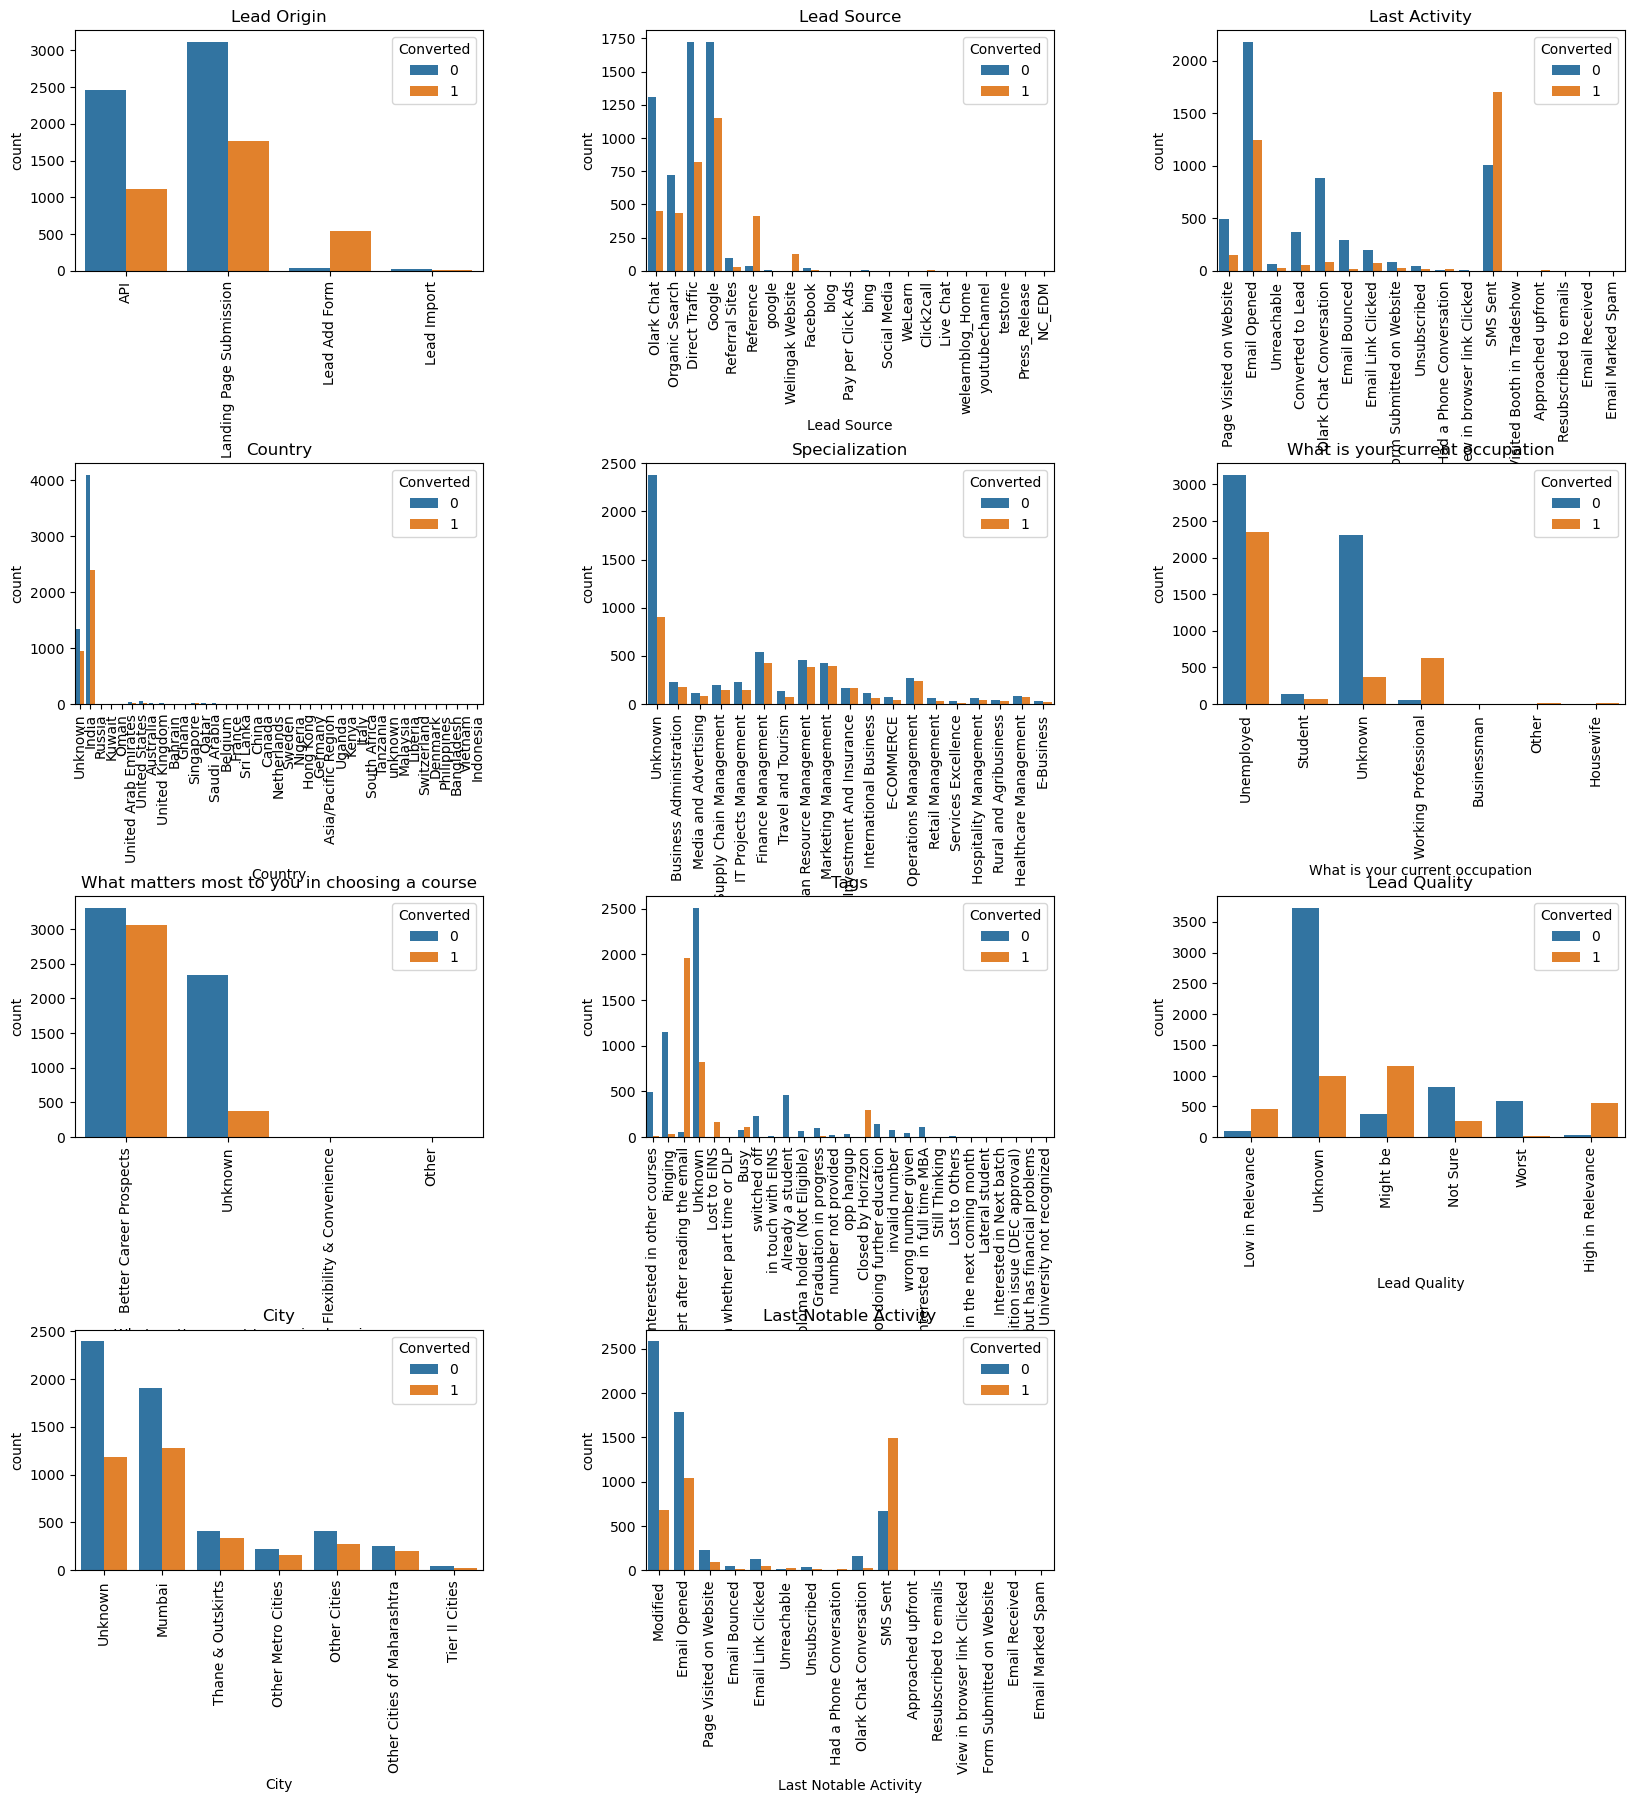

In [46]:
# plot_col=[list(df.select_dtypes(include='O').columns[1:])]
plot_col=['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 
          'What matters most to you in choosing a course', 'Tags', 'Lead Quality', 'City', 'Last Notable Activity']
plt.figure(figsize=(20,20))
for i,col in enumerate(plot_col):
    plt.subplot(4,3,i+1)
    sns.countplot(data=df, x=col, hue='Converted')
    plt.title(col)
    plt.xticks(rotation=90)
# plt.tight_layout()
plt.subplots_adjust(hspace=0.8, wspace=0.4)
plt.show()




here are some Observations:
1. lead origin - API and landing pade submission has lower conversion rate but has considerable counts. However, Lead add form has good conversion rate.
2. lead source- google and direct trafic has less conversion rate but reference and weligkit website has good conversion rate
3. lead score- There are several counts which are negligible, which we can mearge together
4. Last activity- not able to detect significant insights, However, several counts are negligible which can be combine.
5. Country- India has highest count. other countries are have less contribution, we can combine othere countries as one.
6. Specialization: Finance and Marketing specialization leads counts are significant.
7. Occupation- unemployeed and unknown categroy has more counts but less conversion rate, at other hand working professional CR is high
8. Course Intent-  Better career prospect is the main reason of most of the applicants and CR is high.
9. lead quality- Even though employee has marked low relevance but this category has highest conversion rate
10. City- City like Mumbai, Thane has more counts and CR

In [48]:
# As we have seen there are some features in which some categories values are very less and hence we can neglect or combine
# There are some lead sources which values are very less

print(df['Lead Source'].value_counts())
df['Lead Source']=df['Lead Source'].replace('google','Google')

Col_to_combine=['bing','Click2call','Social Media','Live Chat','Press_Release','Pay per Click Ads','blog','WeLearn','welearnblog_Home','youtubechannel',
               'testone','NC_EDM']
df['Lead Source']=df['Lead Source'].replace(Col_to_combine,'Other_Source')
df['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64


Lead Source
Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Facebook              31
Other_Source          23
Name: count, dtype: int64

In [49]:
# Similarly, Users Last activity, there are some categories which values are very less and hence we can combine
print(df['Last Activity'].value_counts())
cat_to_combine=['View in browser link Clicked','Approached upfront','Email Received','Email Marked Spam',
                'Visited Booth in Tradeshow','Resubscribed to emails']
df['Last Activity']=df['Last Activity'].replace(cat_to_combine,'Other_Activities')
print(df['Last Activity'].value_counts())

Last Activity
Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64
Last Activity
Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    90
Unsubscribe

In [50]:
# Similarly, customer Tags, there are some categories which values are very less and hence we can combine
print(df['Tags'].value_counts())
cat_to_combine=['Diploma holder (Not Eligible)','wrong number given','opp hangup','number not provided','in touch with EINS','Lost to Others','Still Thinking','Want to take admission but has financial problems','In confusion whether part time or DLP',
'Interested in Next batch','Lateral student','Shall take in the next coming month','University not recognized','Recognition issue (DEC approval)']
df['Tags']=df['Tags'].replace(cat_to_combine,'Other_Tags')
print(df['Tags'].value_counts())

Tags
Unknown                                              3327
Will revert after reading the email                  2016
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch 

In [51]:
# Similarly, Last notable activities, there are some categories which values are very less and hence we can combine
print(df['Last Notable Activity'].value_counts())
cat_to_combine=['Email Marked Spam','Approached upfront','Resubscribed to emails','View in browser link Clicked','Form Submitted on Website','Email Received']
df['Last Notable Activity']=df['Last Notable Activity'].replace(cat_to_combine,'Other_Last_Notable_Activities')
print(df['Last Notable Activity'].value_counts())

Last Notable Activity
Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64
Last Notable Activity
Modified                         3267
Email Opened                     2823
SMS Sent                         2152
Page Visited on Website           318
Olark Chat Conversation           183
Email Link Clicked                173
Email Bounced                      60
Unsubscribed                       45
Unreachable                       

### Check the Outliers

In [53]:
df.select_dtypes(include=['int','float']).describe(percentiles=[0.25,0.5,0.75,0.8,0.85,0.90,0.95,0.98,0.99])

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Asymmetrique Activity Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.0,9074.0,9074.000000,9074.0,9074.000000
mean,617032.619352,0.078907,0.000220,0.378554,3.456028,482.887481,2.370151,0.001543,0.0,0.000220,0.000110,0.000110,0.000441,0.000771,0.0,0.0,0.0,2.864889,0.0,0.318272
std,23348.029512,0.269608,0.014845,0.485053,4.858802,545.256560,2.160871,0.039251,0.0,0.014845,0.010498,0.010498,0.020992,0.027766,0.0,0.0,0.0,1.101403,0.0,0.465831
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000,0.0,0.000000
25%,596406.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.000000,0.0,0.000000
50%,615278.500000,0.000000,0.000000,0.000000,3.000000,246.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.000000,0.0,0.000000
75%,637176.500000,0.000000,0.000000,1.000000,5.000000,922.750000,3.200000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,4.000000,0.0,1.000000
80%,641384.200000,0.000000,0.000000,1.000000,5.000000,1078.400000,4.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,4.000000,0.0,1.000000
85%,645243.450000,0.000000,0.000000,1.000000,6.000000,1226.000000,4.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,4.000000,0.0,1.000000
90%,650276.800000,0.000000,0.000000,1.000000,7.000000,1373.000000,5.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,4.000000,0.0,1.000000


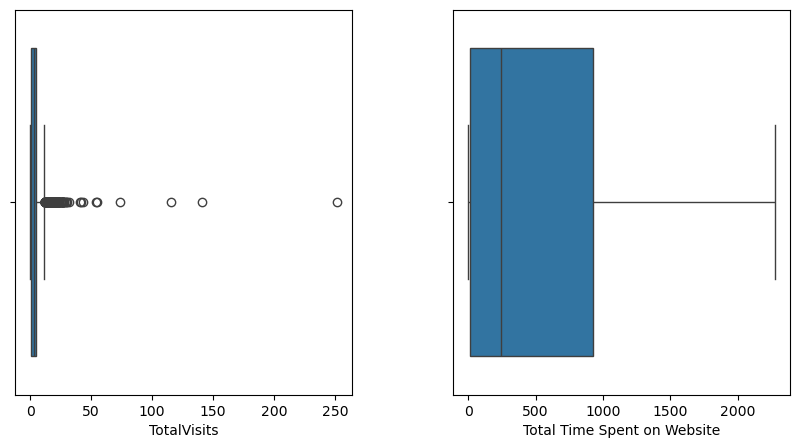

In [54]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x='TotalVisits',data=df)
plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.subplot(1,2,2)
sns.boxplot(x='Total Time Spent on Website',data=df)
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [55]:
fix_outlier_col=['TotalVisits','Total Time Spent on Website']

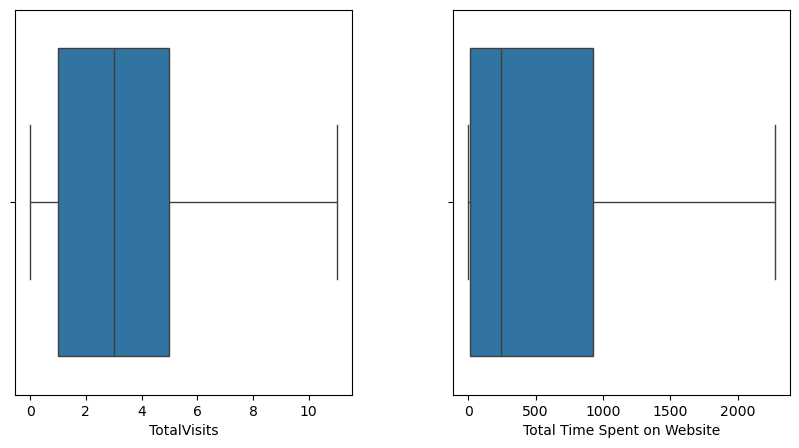

In [56]:

for col in fix_outlier_col:
    q3=df[col].describe()["75%"]
    q1=df[col].describe()["25%"]
    iqr=q3-q1
    lower_whisker=q1-1.5*iqr
    upper_whisker=q3+1.5*iqr
    df[col]=np.where(df[col]>upper_whisker,upper_whisker,df[col]) #capping
    df[col]=np.where(df[col]<lower_whisker,lower_whisker,df[col]) #flooring
    if df[col].max()>upper_whisker:
        print(col, "some issue")
    if df[col].min()<lower_whisker:
        print(col,"some issue")

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x='TotalVisits',data=df)
plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.subplot(1,2,2)
sns.boxplot(x='Total Time Spent on Website',data=df)
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

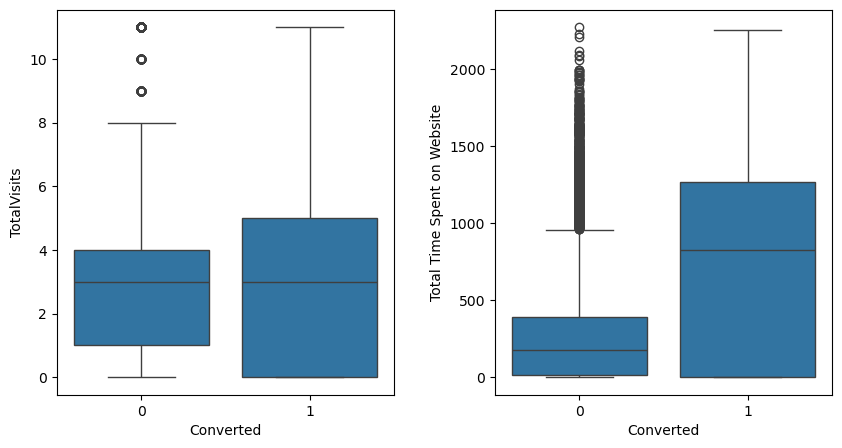

In [57]:
# plotting the numerical col vs target col

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y='TotalVisits',x='Converted',data=df)
plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.subplot(1,2,2)
sns.boxplot(y='Total Time Spent on Website',x='Converted',data=df)
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

Observations: The customer who spends more time on wensite are more likely to convert

In [59]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0.0,0.0,Page Visited on Website,Unknown,Unknown,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Unknown,2.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674.0,2.5,Email Opened,India,Unknown,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Unknown,0,0,Unknown,2.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532.0,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,2.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305.0,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,2.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428.0,1.0,Converted to Lead,India,Unknown,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,2.0,0,0,Modified


In [60]:
df[['Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview']].describe()

,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9074.000000,9074.0,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.0,9074.0,9074.0,9074.000000
mean,0.001543,0.0,0.000220,0.000110,0.000110,0.000441,0.000771,0.0,0.0,0.0,0.0,0.318272
std,0.039251,0.0,0.014845,0.010498,0.010498,0.020992,0.027766,0.0,0.0,0.0,0.0,0.465831
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000


In [61]:
# we can drop above columns as it does not have insights. Dropping unnecessary columns.
col_to_drop=['Prospect ID','Lead Number','Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview']
df=df.drop(col_to_drop,axis=1)

In [62]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Quality,City,Asymmetrique Activity Index,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0.0,0.0,Page Visited on Website,Unknown,Unknown,Unemployed,Better Career Prospects,Interested in other courses,Low in Relevance,Unknown,2.0,Modified
1,API,Organic Search,0,0,0,5.0,674.0,2.5,Email Opened,India,Unknown,Unemployed,Better Career Prospects,Ringing,Unknown,Unknown,2.0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532.0,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Might be,Mumbai,2.0,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305.0,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Not Sure,Mumbai,2.0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428.0,1.0,Converted to Lead,India,Unknown,Unemployed,Better Career Prospects,Will revert after reading the email,Might be,Mumbai,2.0,Modified


In [63]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
       'City', 'Asymmetrique Activity Index', 'Last Notable Activity'],
      dtype='object')

In [64]:
# Step4: Dummy variable creation
dummy= pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
       'City', 'Asymmetrique Activity Index', 'Last Notable Activity']],drop_first=True,dtype='float')
dummy.head()

,Do Not Email,Do Not Call,Asymmetrique Activity Index,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other_Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Unknown,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_Unknown,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Unknown,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Unknown,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Last_Notable_Activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0

In [65]:
df=df.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation','What matters most to you in choosing a course', 'Tags',
'Lead Quality', 'City', 'Asymmetrique Activity Index', 'Last Notable Activity'], axis=1)
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0.0,0.0,0.0
1,0,5.0,674.0,2.5
2,1,2.0,1532.0,2.0
3,0,1.0,305.0,1.0
4,1,2.0,1428.0,1.0


In [66]:
df=pd.concat([df,dummy],axis=1)
df.head(2)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email,Do Not Call,Asymmetrique Activity Index,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other_Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Unknown,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_Unknown,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Unknown,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Unknown,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Last_Notable_Activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0.0,0.0,0.0,0,0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,5.0,674.0,2.5,0,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,

# Step4: Train-test split

In [68]:
# Putting features variable to x
X= df.drop(['Converted'],axis=1)
y=df['Converted']



In [69]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email,Do Not Call,Asymmetrique Activity Index,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other_Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Unknown,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_Unknown,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Unknown,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Unknown,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Last_Notable_Activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0.0,0.0,0.0,0,0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,674.0,2.5,0,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.

In [70]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [71]:
# splitting the data to train and test 
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

# Step5: Feature scaling

In [73]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email,Do Not Call,Asymmetrique Activity Index,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other_Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Unknown,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_Unknown,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Unknown,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Unknown,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Last_Notable_Activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3009,2.0,397.0,2.0,0,0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1012,2.0,190.0,2.0,1,0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.

In [74]:
scaler=StandardScaler()

num_var1=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

X_train[num_var1]=scaler.fit_transform(X_train[num_var1])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email,Do Not Call,Asymmetrique Activity Index,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other_Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Unknown,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_Unknown,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Unknown,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Unknown,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Last_Notable_Activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3009,-0.431325,-0.160255,-0.179666,0,0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1012,-0.431325,-0.540048,-0.179666,1,0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [75]:
# Checking the conversion rate
CR=(sum(df['Converted'])/len(df['Converted'].index))*100
print("Conversion Rate is" ,CR)

Conversion Rate is 37.85541106458012


# STEP 6: Looking at Correlations

In [77]:
# Correlation between different numerical variables
conv_corr=df.corr()



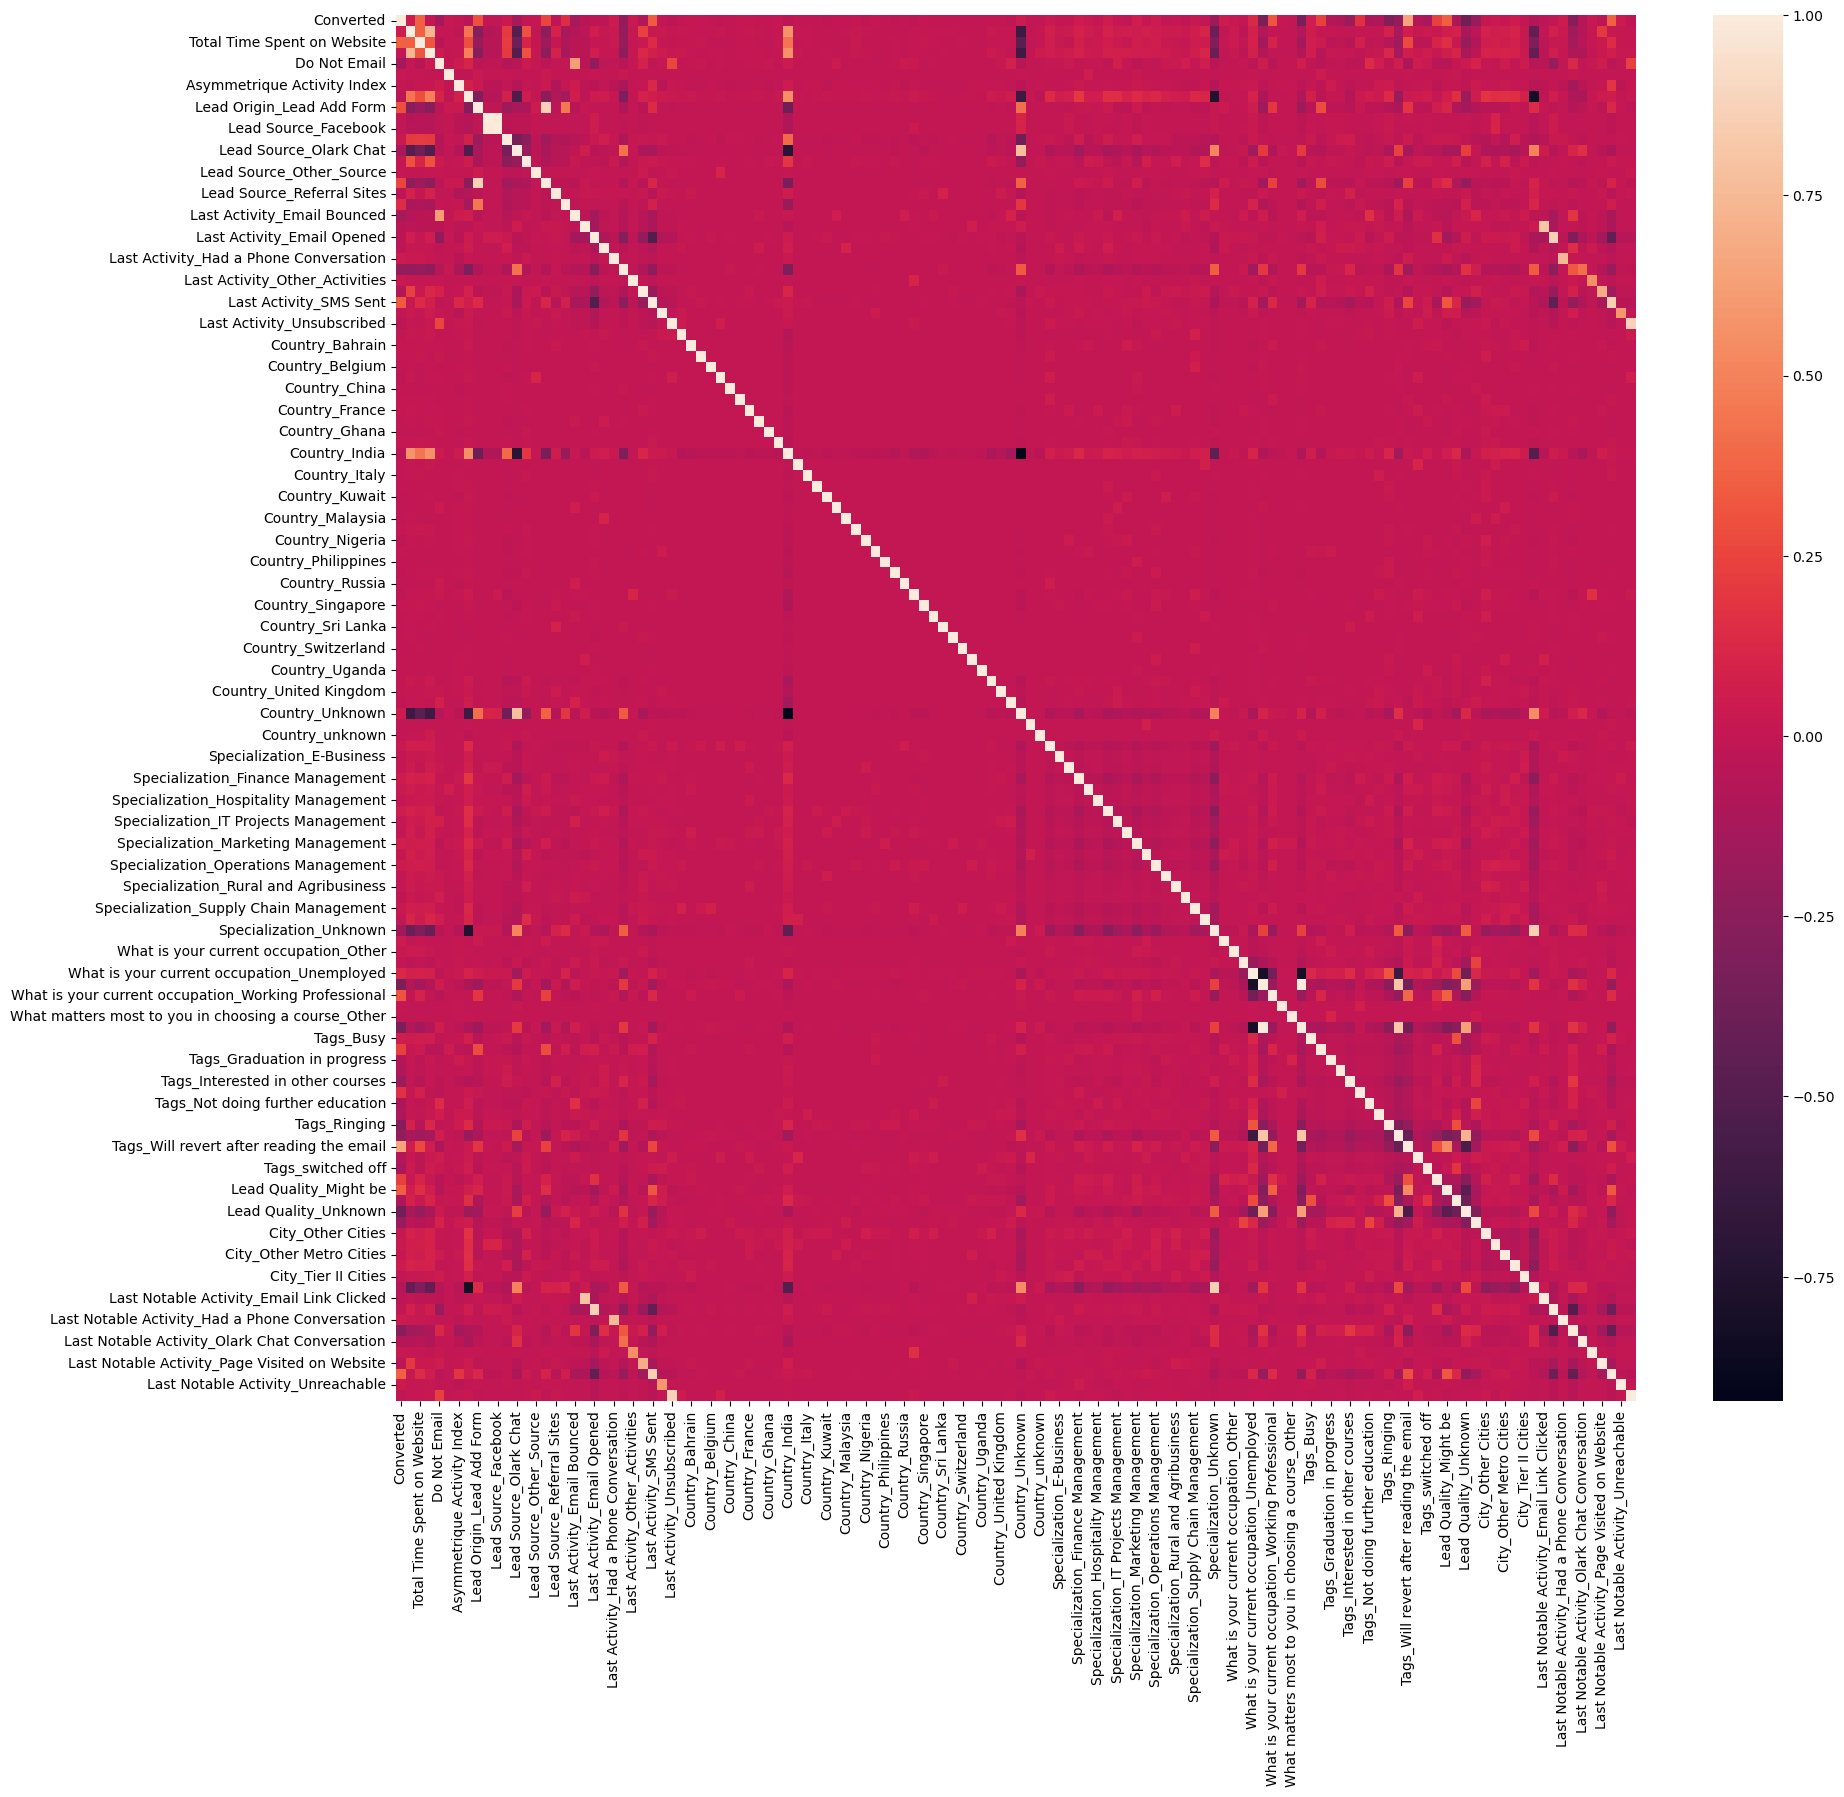

In [78]:
#Plotting the heatmap to check the correlation between features
plt.figure(figsize=(20,18))
sns.heatmap(conv_corr)
plt.show()

In [79]:
# it is very hard to detect the features which has high correlation and hence we need to check matrix
# Correlation Matrix
conv_corr_unstacked=conv_corr.unstack().sort_values(kind='quicksort')
conv_corr.where(np.triu(np.ones(conv_corr.shape),k=1).astype(np.bool_)).stack().sort_values(ascending=False).head(10)

What is your current occupation_Unknown                What matters most to you in choosing a course_Unknown    0.994996
Lead Origin_Lead Import                                Lead Source_Facebook                                     0.983684
Last Activity_Unsubscribed                             Last Notable Activity_Unsubscribed                       0.872656
Lead Origin_Lead Add Form                              Lead Source_Reference                                    0.866191
Last Activity_Email Opened                             Last Notable Activity_Email Opened                       0.861636
Last Activity_SMS Sent                                 Last Notable Activity_SMS Sent                           0.853102
Specialization_Unknown                                 City_Unknown                                             0.852860
What matters most to you in choosing a course_Unknown  Tags_Unknown                                             0.815343
What is your current occupation_

In [80]:
#Dropping Highly correlated features
X_train=X_train.drop(['What matters most to you in choosing a course_Unknown','Lead Source_Facebook','Last Notable Activity_Unsubscribed',
                      'Last Notable Activity_Email Opened','Last Notable Activity_SMS Sent','Last Notable Activity_Email Link Clicked'],axis=1)
X_test=X_test.drop(['What matters most to you in choosing a course_Unknown','Lead Source_Facebook','Last Notable Activity_Unsubscribed',
                      'Last Notable Activity_Email Opened','Last Notable Activity_SMS Sent','Last Notable Activity_Email Link Clicked'],axis=1)

# Step 9: Model Building

In [82]:
# Running the first Model
import statsmodels.api as sm

# Logistic regression Model
logml=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
# fit the model
model=logml.fit()
# check summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6233
Model Family:                Binomial   Df Model:                          117
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 17 Mar 2025   Deviance:                       45499.
Time:                        17:24:00   Pearson chi2:                 2.22e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                   -6.608e+14   5.57e+07  -1.19e+07      0.000   -6.61e+14   -6.61e+14
TotalVisits                                                              8.399e+13   1.45e+06   5.81e+07      0.000     8.4e+13     8.4e+13
Total Time Spent on Website                                              1.943e+14   1.05e+06   1.86e+08      0.000    1.94e+14    1.94e+14
Page Views Per Visit                                                    -4.982e+13   1.44e+06  -3.46e+07      0.000   -4.98e+13   -4.98e+13
Do Not Email                                                            -2.915e+14   4.45e+06  -6.54e+07      0.000   -2.91e+14   -2.91e+14
Do Not Call                                                               3.58e+15   4.79e+07   7.48e+07      0.000    3.58e+15    3.58e+15
Asymmetrique Activity Index                                             -6.407e+13   8.02e+05  -7.99e+07      0.000   -6.41e+13   -6.41e+13
Lead Origin_Landing Page Submission                                     -3.057e+14   3.85e+06  -7.94e+07      0.000   -3.06e+14   -3.06e+14
Lead Origin_Lead Add Form                                               -5.259e+14   2.92e+07   -1.8e+07      0.000   -5.26e+14   -5.26e+14
Lead Origin_Lead Import                                                 -5.842e+14   1.62e+07  -3.61e+07      0.000   -5.84e+14   -5.84e+14
Lead Source_Google                                                        6.23e+13   2.46e+06   2.53e+07      0.000    6.23e+13    6.23e+13
Lead Source_Olark Chat                                                   2.146e+13   7.18e+06   2.99e+06      0.000    2.15e+13    2.15e+13
Lead Source_Organic Search                                               5.871e+12   3.23e+06   1.82e+06      0.000    5.87e+12    5.87e+12
Lead Source_Other_Source                                                -1.256e+14   1.87e+07  -6.72e+06      0.000   -1.26e+14   -1.26e+14
Lead Source_Reference                                                    1.164e+14   2.91e+07      4e+06      0.000    1.16e+14    1.16e+14
Lead Source_Referral Sites                                              -2.591e+13   7.93e+06  -3.27e+06      0.000   -2.59e+13   -2.59e+13
Lead Source_Welingak Website                                             6.037e+14   2.97e+07   2.04e+07      0.000    6.04e+14    6.04e+14
Last Activity_Email Bounced                                              -1.98e+14   7.52e+06  -2.63e+07      0.000   -1.98e+14   -1.98e+14
Last Activity_Email Link Clicked                                        -2.832e+14   6.81e+06  -4.16e+07      0.000   -2.83e+14   -2.83e+14
Las

# Step 10: Feature Elimination using RFE

In [84]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [85]:
from sklearn.feature_selection import RFE
rfe=RFE(logreg,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [86]:
print(rfe.support_)

[False False False  True False False False False False False False False
 False False False  True False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False  True  True False False False
  True False False  True  True  True  True  True False False False False
  True False False False False False False False  True  True False False
 False]


In [87]:
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('TotalVisits', False, 62),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 66),
 ('Do Not Email', True, 1),
 ('Do Not Call', False, 76),
 ('Asymmetrique Activity Index', False, 72),
 ('Lead Origin_Landing Page Submission', False, 21),
 ('Lead Origin_Lead Add Form', False, 4),
 ('Lead Origin_Lead Import', False, 23),
 ('Lead Source_Google', False, 44),
 ('Lead Source_Olark Chat', False, 87),
 ('Lead Source_Organic Search', False, 88),
 ('Lead Source_Other_Source', False, 24),
 ('Lead Source_Reference', False, 46),
 ('Lead Source_Referral Sites', False, 64),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 58),
 ('Last Activity_Email Link Clicked', False, 30),
 ('Last Activity_Email Opened', False, 56),
 ('Last Activity_Form Submitted on Website', False, 90),
 ('Last Activity_Had a Phone Conversation', False, 28),
 ('Last Activity_Olark Chat Conversation', False, 22),
 ('Last Activity_Other_Activities', False, 25),
 ('Last

In [88]:
# Sorting only True col
col=X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'What is your current occupation_Unknown',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Unknown',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [89]:
# features which will drop
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Do Not Call', 'Asymmetrique Activity Index',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat',
       ...
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities', 'City_Unknown',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Other_Last_Notable_Activities',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unreachable'],
      dtype='object', length=106)

#### Assignining The method with StatsModel


In [91]:
# rerun the Model after RFE
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1181.4
Date:                Mon, 17 Mar 2025   Deviance:                       2362.9
Time:                        17:24:03   Pearson chi2:                 1.34e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6175
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.7514      0.195    -14.123      0.000      -3.133      -2.370
Do Not Email                                     -1.4698      0.258     -5.706      0.000      -1.975      -0.965
Lead Source_Welingak Website                      2.5721      0.744      3.455      0.001       1.113       4.031
Last Activity_SMS Sent                            2.2662      0.125     18.181      0.000       2.022       2.511
What is your current occupation_Unknown          -2.6219      0.151    -17.369      0.000      -2.918      -2.326
Tags_Busy                                         1.8347      0.288      6.370      0.000       1.270       2.399
Tags_Closed by Horizzon                           8.4548      0.741     11.410      0.000       7.003       9.907
Tags_Lost to EINS                                 9.4943      0.789     12.029      0.000       7.947      11.041
Tags_Ringing                                     -2.1509      0.303     -7.094      0.000      -2.745      -1.557
Tags_Unknown                                      3.3371      0.224     14.900      0.000       2.898       3.776
Tags_Will revert after reading the email          6.3475      0.260     24.436      0.000       5.838       6.857
Tags_invalid number                             -22.4657   1.48e+04     -0.002      0.999   -2.91e+04     2.9e+04
Tags_switched off                                -2.1711      0.552     -3.936      0.000      -3.252      -1.090
Lead Quality_Worst                               -2.3592      0.836     -2.821      0.005      -3.999      -0.720
Last Notable Activity_Modified                   -1.6015      0.130    -12.323      0.000      -1.856      -1.347
Last Notable Activity_Olark Chat Conversation    -1.2510      0.408     -3.067      0.002      -2.050      -0.452
=================================================================================================================
"""

In [92]:
# Checking the VIF for features variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [93]:
# Create tHe dataframe that contains the name of all features variables and their respective VIF values
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range (X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
8,Tags_Unknown,5.10
3,What is your current occupation_Unknown,4.76
2,Last Activity_SMS Sent,1.68
13,Last Notable Activity_Modified,1.57
9,Tags_Will revert after reading the email,1.38
1,Lead Source_Welingak Website,1.14
0,Do Not Email,1.13
7,Tags_Ringing,1.13
12,Lead Quality_Worst,1.11
5,Tags_Closed by Horizzon,1.06


#### Here we can see that, VIF value is higher for Tags_Unknown and hence first we will remove this feature and re-run the model.


In [95]:
col=col.drop(['Tags_Unknown'],1)

In [96]:
# let's rebuild the model
X_train_sm=sm.add_constant(X_train[col])
logm3=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1335.4
Date:                Mon, 17 Mar 2025   Deviance:                       2670.8
Time:                        17:24:03   Pearson chi2:                 1.48e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5985
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.8272      0.091     -9.077      0.000      -1.006      -0.649
Do Not Email                                     -1.3497      0.254     -5.317      0.000      -1.847      -0.852
Lead Source_Welingak Website                      4.0299      0.744      5.419      0.000       2.572       5.487
Last Activity_SMS Sent                            2.2849      0.114     20.000      0.000       2.061       2.509
What is your current occupation_Unknown          -1.1700      0.116    -10.070      0.000      -1.398      -0.942
Tags_Busy                                        -0.0617      0.238     -0.259      0.796      -0.529       0.406
Tags_Closed by Horizzon                           6.7818      0.722      9.387      0.000       5.366       8.198
Tags_Lost to EINS                                 7.4237      0.835      8.896      0.000       5.788       9.059
Tags_Ringing                                     -4.0857      0.255    -16.017      0.000      -4.586      -3.586
Tags_Will revert after reading the email          4.5472      0.199     22.859      0.000       4.157       4.937
Tags_invalid number                             -24.3452   1.46e+04     -0.002      0.999   -2.85e+04    2.85e+04
Tags_switched off                                -4.1111      0.527     -7.805      0.000      -5.144      -3.079
Lead Quality_Worst                               -3.6757      0.620     -5.933      0.000      -4.890      -2.461
Last Notable Activity_Modified                   -1.8801      0.123    -15.236      0.000      -2.122      -1.638
Last Notable Activity_Olark Chat Conversation    -0.8712      0.389     -2.239      0.025      -1.634      -0.109
=================================================================================================================
"""

In [97]:
# let's checck the VIF agian
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range (X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,Last Activity_SMS Sent,1.59
12,Last Notable Activity_Modified,1.55
3,What is your current occupation_Unknown,1.42
8,Tags_Will revert after reading the email,1.35
0,Do Not Email,1.12
7,Tags_Ringing,1.12
11,Lead Quality_Worst,1.11
5,Tags_Closed by Horizzon,1.05
4,Tags_Busy,1.04
10,Tags_switched off,1.04


#### VIF seems good however, P values is higher that 0.05 for 'Tags_invalid number'. lets drop the same. let's re-run the model


In [99]:
col=col.drop(['Tags_invalid number'],1)

In [100]:
# let's rebuild the model
X_train_sm=sm.add_constant(X_train[col])
logm4=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1363.4
Date:                Mon, 17 Mar 2025   Deviance:                       2726.8
Time:                        17:24:03   Pearson chi2:                 1.37e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5949
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.9166      0.091    -10.126      0.000      -1.094      -0.739
Do Not Email                                     -1.3541      0.249     -5.431      0.000      -1.843      -0.865
Lead Source_Welingak Website                      4.1299      0.742      5.566      0.000       2.675       5.584
Last Activity_SMS Sent                            2.1932      0.111     19.729      0.000       1.975       2.411
What is your current occupation_Unknown          -1.0509      0.114     -9.210      0.000      -1.275      -0.827
Tags_Busy                                         0.0798      0.235      0.340      0.734      -0.381       0.540
Tags_Closed by Horizzon                           6.8341      0.723      9.459      0.000       5.418       8.250
Tags_Lost to EINS                                 7.4697      0.843      8.862      0.000       5.818       9.122
Tags_Ringing                                     -3.9200      0.253    -15.515      0.000      -4.415      -3.425
Tags_Will revert after reading the email          4.6203      0.198     23.322      0.000       4.232       5.009
Tags_switched off                                -3.9411      0.525     -7.502      0.000      -4.971      -2.911
Lead Quality_Worst                               -3.7383      0.614     -6.091      0.000      -4.941      -2.535
Last Notable Activity_Modified                   -1.8303      0.122    -14.953      0.000      -2.070      -1.590
Last Notable Activity_Olark Chat Conversation    -0.8654      0.388     -2.232      0.026      -1.626      -0.105
=================================================================================================================
"""

In [101]:
# Re-run the VIF
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range (X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,Last Activity_SMS Sent,1.58
11,Last Notable Activity_Modified,1.55
3,What is your current occupation_Unknown,1.42
8,Tags_Will revert after reading the email,1.35
0,Do Not Email,1.12
7,Tags_Ringing,1.12
10,Lead Quality_Worst,1.11
5,Tags_Closed by Horizzon,1.05
4,Tags_Busy,1.04
9,Tags_switched off,1.04


#### VIF is within the range , However P value for Tags_Busy is higher than 0.05. Hence drop it and re-run the model

In [103]:

col=col.drop(['Tags_Busy'],1)

In [104]:
# let's rebuild the model
X_train_sm=sm.add_constant(X_train[col])
logm5=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1363.5
Date:                Mon, 17 Mar 2025   Deviance:                       2726.9
Time:                        17:24:03   Pearson chi2:                 1.38e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5949
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.9087      0.087    -10.393      0.000      -1.080      -0.737
Do Not Email                                     -1.3570      0.249     -5.447      0.000      -1.845      -0.869
Lead Source_Welingak Website                      4.1214      0.742      5.557      0.000       2.668       5.575
Last Activity_SMS Sent                            2.1998      0.110     20.085      0.000       1.985       2.414
What is your current occupation_Unknown          -1.0611      0.110     -9.633      0.000      -1.277      -0.845
Tags_Closed by Horizzon                           6.8283      0.722      9.453      0.000       5.413       8.244
Tags_Lost to EINS                                 7.4713      0.843      8.861      0.000       5.819       9.124
Tags_Ringing                                     -3.9333      0.250    -15.754      0.000      -4.423      -3.444
Tags_Will revert after reading the email          4.6131      0.197     23.420      0.000       4.227       4.999
Tags_switched off                                -3.9546      0.524     -7.548      0.000      -4.981      -2.928
Lead Quality_Worst                               -3.7469      0.613     -6.111      0.000      -4.949      -2.545
Last Notable Activity_Modified                   -1.8326      0.122    -14.996      0.000      -2.072      -1.593
Last Notable Activity_Olark Chat Conversation    -0.8678      0.388     -2.238      0.025      -1.628      -0.108
=================================================================================================================
"""

#### Now it seems to be good model, hence we can make this as final model

# STEP 11:Calculating Accuracy and Other Evaluation Metrics

In [107]:
# model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

In [108]:
# Getting The predicted Values on the train dataset
y_train_pred= res.predict(X_train_sm)
y_train_pred.head()

3009    0.122413
1012    0.094005
9226    0.011264
4750    0.557261
7987    0.999023
dtype: float64

In [109]:
# reshaping the predicted values
y_train_pred = y_train_pred.values.reshape(-1)

### Creating a Dataframe with actual converted customers and the predicted probabilities

In [111]:
y_train_pred_final=pd.DataFrame({"Convert":y_train.values,"Convert_Prob":y_train_pred})
y_train_pred_final['Pros_ID'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID
0,0,0.122413,3009
1,0,0.094005,1012
2,0,0.011264,9226
3,1,0.557261,4750
4,1,0.999023,7987


In [112]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
0,0,0.122413,3009,0
1,0,0.094005,1012,0
2,0,0.011264,9226,0
3,1,0.557261,4750,1
4,1,0.999023,7987,1


In [113]:

print("Accuracy score", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy score 0.923161706817824


In [114]:
# creating Function for Evaluation
def evaluate_model(y_true, y_predicted, print_score=False):
    confusion = metrics.confusion_matrix(y_true, y_predicted)
    # Predicted     not_converted    converted
    # Actual
    # not_converted        TN         FP
    # converted            FN         TP

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    accuracy_sc = metrics.accuracy_score(y_true, y_predicted)
    sensitivity_score = TP / float(TP+FN)
    specificity_score = TN / float(TN+FP)
    precision_sc = precision_score(y_true, y_predicted)
    
    if print_score:
        print("Confusion Matrix :\n", confusion)
        print("Accuracy :", accuracy_sc)
        print("Sensitivity :", sensitivity_score)
        print("Specificity :", specificity_score)
        print("Precision :", precision_sc)
        
    return accuracy_sc, sensitivity_score, specificity_score, precision_sc

In [115]:
# Evaluating model
evaluate_model(y_train_pred_final.Convert, y_train_pred_final.predicted, print_score=True)

Confusion Matrix :
 [[3741  164]
 [ 324 2122]]
Accuracy : 0.923161706817824
Sensitivity : 0.8675388389206868
Specificity : 0.9580025608194622
Precision : 0.9282589676290464


(0.923161706817824, 0.8675388389206868, 0.9580025608194622, 0.9282589676290464)

# Step 12: Plotting the ROC Curve
## An ROC curve

- shows tradeoff between sensitivity and specificity (increase in one will cause decrease in other).
- The closer the curve follows the y-axis and then the top border of the ROC space, means more area under the curve and the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space i.e. the reference line, means less area and the less accurate is the test.
Here, our goal is to have achieve good sensitivity score

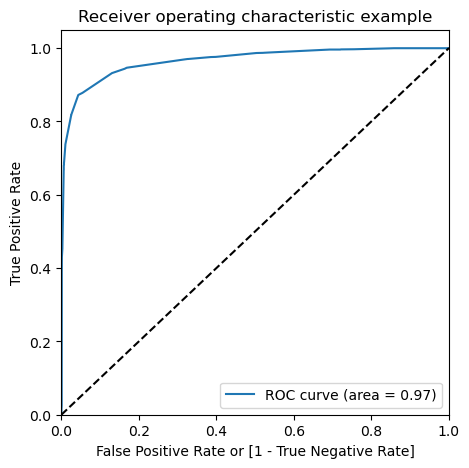

In [117]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)


# Step 13: Finding optimal value of the cut off

Optimal Cut off probability is the one where we get balance between sensitivity and specificity

In [120]:
# let's create the col with different probability cutoff

numbers= [float (x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]=y_train_pred_final.Convert_Prob.map(lambda x: 1 if x>i else 0)

In [121]:
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.122413,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.094005,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.011264,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.557261,4750,1,1,1,1,1,1,1,0,0,0,0
4,1,0.999023,7987,1,1,1,1,1,1,1,1,1,1,1


In [122]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.793103  0.968929  0.682971
0.2   0.2  0.892300  0.932543  0.867093
0.3   0.3  0.919540  0.877760  0.945711
0.4   0.4  0.923949  0.872036  0.956466
0.5   0.5  0.923162  0.867539  0.958003
0.6   0.6  0.914187  0.817661  0.974648
0.7   0.7  0.914344  0.817661  0.974904
0.8   0.8  0.892143  0.736304  0.989757
0.9   0.9  0.875768  0.688471  0.993086


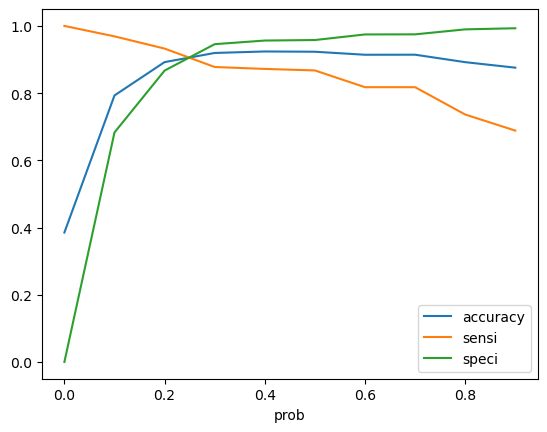

In [123]:
# let's Plot the accuracy sensitivity and specificity for various probabilities
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.25 is the optimum point to take it as cutoff probability

In [125]:
# Getting The predicted Values on the train dataset

y_train_pred_final['predicted']=y_train_pred_final['Convert_Prob'].map(lambda x: 1 if x>0.25 else 0)
print(y_train_pred_final.head())

# let's check the overall accuracy
print(metrics.accuracy_score(y_true=y_train_pred_final['Convert'],y_pred=y_train_pred_final['predicted']))

   Convert  Convert_Prob  Pros_ID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0        0      0.122413     3009          0    1    1    0    0    0    0   
1        0      0.094005     1012          0    1    0    0    0    0    0   
2        0      0.011264     9226          0    1    0    0    0    0    0   
3        1      0.557261     4750          1    1    1    1    1    1    1   
4        1      0.999023     7987          1    1    1    1    1    1    1   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    1    1    1    1  
0.8934026137616123


In [126]:
# Evaluating model performance on training data

evaluate_model(y_train_pred_final.Convert, y_train_pred_final.predicted, print_score=True)

Confusion Matrix :
 [[3395  510]
 [ 167 2279]]
Accuracy : 0.8934026137616123
Sensitivity : 0.9317252657399836
Specificity : 0.8693982074263764
Precision : 0.8171387594119757


(0.8934026137616123,
 0.9317252657399836,
 0.8693982074263764,
 0.8171387594119757)

## Precision-Recall Trade off

In [128]:
from sklearn.metrics import precision_score, recall_score

In [129]:
precision_score (y_train_pred_final.Convert, y_train_pred_final.predicted)

0.8171387594119757

In [130]:
recall_score(y_train_pred_final.Convert, y_train_pred_final.predicted)

0.9317252657399836

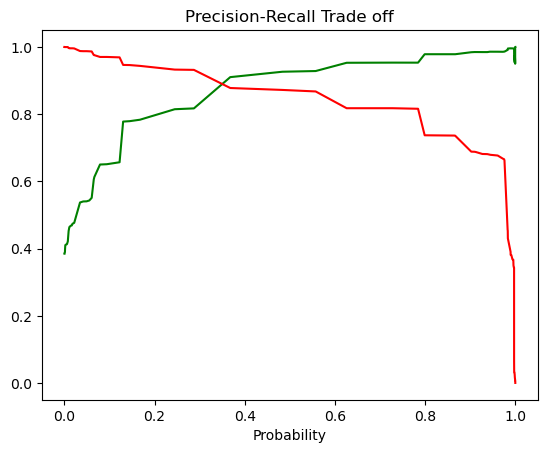

In [131]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel("Probability")
plt.title("Precision-Recall Trade off")
plt.show()

In [132]:
#### Observation: Here 0.35 value looks optimal. However, we have taken 0.25, hence we can take 0.35 value for prediction.
y_train_pred_final = y_train_pred_final.iloc[:, :3]
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.35 else 0)

y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted,Lead_Score
0,0,0.122413,3009,0,12
1,0,0.094005,1012,0,9
2,0,0.011264,9226,0,1
3,1,0.557261,4750,1,56
4,1,0.999023,7987,1,100


In [133]:
# Evaluating model performance on training data

evaluate_model(y_train_pred_final.Convert, y_train_pred_final.predicted, print_score=True)

Confusion Matrix :
 [[3693  212]
 [ 299 2147]]
Accuracy : 0.9195402298850575
Sensitivity : 0.8777596075224857
Specificity : 0.9457106274007683
Precision : 0.9101314116150911


(0.9195402298850575,
 0.8777596075224857,
 0.9457106274007683,
 0.9101314116150911)

# STEP 14:prediction on test data set


In [135]:
# Getting the predicted values on the test set
X_test_sm = sm.add_constant(X_test[col])
y_test_pred = res.predict(X_test_sm)

y_test_df = pd.DataFrame(y_test)
y_test_pred_df = pd.DataFrame(y_test_pred, columns=["Convert_Prob"])
y_test_df['Prospect ID'] = y_test_df.index

y_predicted_final = pd.concat([y_test_df.reset_index(drop=True), y_test_pred_df.reset_index(drop=True)],axis=1)
y_predicted_final['final_predicted'] = y_predicted_final.Convert_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_predicted_final['Lead_Score'] = y_predicted_final.Convert_Prob.map(lambda x: round(x*100))

y_predicted_final.head()

,Converted,Prospect ID,Convert_Prob,final_predicted,Lead_Score
0,0,3271,0.122413,0,12
1,1,1490,0.975976,1,98
2,0,7936,0.122413,0,12
3,1,4216,0.983487,1,98
4,0,3830,0.122413,0,12


In [136]:
# Evaluating model performance on test data

evaluate_model(y_predicted_final.Converted, y_predicted_final.final_predicted, print_score=True)

Confusion Matrix :
 [[1635   99]
 [ 138  851]]
Accuracy : 0.9129636430407638
Sensitivity : 0.8604651162790697
Specificity : 0.9429065743944637
Precision : 0.8957894736842106


(0.9129636430407638,
 0.8604651162790697,
 0.9429065743944637,
 0.8957894736842106)

In [137]:
print("Features used in Final Model :", col)

print("-----------------------Feature Importance--------------------")
print(res.params)

Features used in Final Model : Index(['Do Not Email', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'What is your current occupation_Unknown',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Worst', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')
-----------------------Feature Importance--------------------
const                                           -0.908699
Do Not Email                                    -1.356992
Lead Source_Welingak Website                     4.121405
Last Activity_SMS Sent                           2.199831
What is your current occupation_Unknown         -1.061079
Tags_Closed by Horizzon                          6.828270
Tags_Lost to EINS                                7.471301
Tags_Ringing                                    -3.933288
Tags_Will revert after read

# Conclusion:

- Logistic Regression Model predicts the probability of lead conversion. Cut off value of Probability is used to classify the target variable, here in this case we have cut off value 0.35.
-  Here the logistic regression model is used to predict the probabilty of conversion of a customer.
-  Optimum cut off is choosen to be 0.35. It means any lead which has greater than 35% probability we can consider that as "Hot lead" and probability less than 35% can be considered as "Cold Lead".
-  Final Model is build with Total 12 Features.
-  Fetaures Used in Models are ['Do Not Email', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'What is your current occupation_Unknown',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Worst', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversat

- Top Three Features which has high Positive coefficient are
          a) Tags_Lost to EINS --7.47
          b) Tags_Closed by Horizzon--6.82
          c) Lead Source_Welingak Website--4.12
- Final Model has 86% Sensitivity, it means we can predict the 86% customer correctly which are truely positive.
- Final Model has 89% precision means , Hence 89% of Hot leads are True Hot leads among the predicted Hot leads.
  ion']